In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import RobustScaler
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn. linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [27]:
data = pd.read_csv('diabetes_binary_BRFSS2015.csv')
data.head(3)

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0


In [28]:
print(data.info())
print(data.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  float64
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   Stroke                70692 non-null  float64
 7   HeartDiseaseorAttack  70692 non-null  float64
 8   PhysActivity          70692 non-null  float64
 9   Fruits                70692 non-null  float64
 10  Veggies               70692 non-null  float64
 11  HvyAlcoholConsump     70692 non-null  float64
 12  AnyHealthcare         70692 non-null  float64
 13  NoDocbcCost           70692 non-null  float64
 14  GenHlth               70692 non-null  float64
 15  MentHlth           

In [29]:
# Checking for any duplicates
duplicates = data.duplicated().sum()
print(duplicates)

1635


In [30]:
#drop duplicate rows
data.drop_duplicates(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 69057 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       69057 non-null  float64
 1   HighBP                69057 non-null  float64
 2   HighChol              69057 non-null  float64
 3   CholCheck             69057 non-null  float64
 4   BMI                   69057 non-null  float64
 5   Smoker                69057 non-null  float64
 6   Stroke                69057 non-null  float64
 7   HeartDiseaseorAttack  69057 non-null  float64
 8   PhysActivity          69057 non-null  float64
 9   Fruits                69057 non-null  float64
 10  Veggies               69057 non-null  float64
 11  HvyAlcoholConsump     69057 non-null  float64
 12  AnyHealthcare         69057 non-null  float64
 13  NoDocbcCost           69057 non-null  float64
 14  GenHlth               69057 non-null  float64
 15  MentHlth              69

#Defining the variables and their values
Diabetes_binary: 0 = no diabetes 1 = diabetes
HighBP: 0 = no high BP, 1 = high BP
HighChol: 0 = no high cholesterol, 1 = high cholesterol
HighChol: 0 = no high cholesterol, 1 = high cholesterol
CholCheck: 0 = no cholesterol check in 5 years, 1 = cholesterol check
BMI: Body Mass Index
Smoker: Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes]; 0 = no, 1 = yes
Stroke: (Ever told) you had a stroke. 0 = no, 1 = yes
HeartDiseaseorAttack: coronary heart disease (CHD) or myocardial infarction (MI); 0 = no 1, = yes
PhysActivity: physical activity in past 30 days - not including job; 0 = no, 1 = yes
Fruits: Consume Fruit 1 or more times per day; 0 = no, 1 = yes
Veggies: Consume Vegetables 1 or more times per day; 0 = no, 1 = yes
HvyAlcoholConsump: Heavy drinkers (adult men having more than 14 drinks per week and adult women having more 
                    than 7 drinks per week); 0 = no, 1 = yes  
AnyHealthcare: Have any kind of health care coverage, including health insurance, 
                    prepaid plans such as HMO, etc.; 0 = no, 1 = yes
NoDocbcCost: Was there a time in the past 12 months when you needed to see a 
                    doctor but could not because of cost?; 0 = no, 1 = yes
GenHlth: Would you say that in general your health is: scale 1-5; 
                    1 = excellent, 2 = very good, 3 = good, 4 = fair, 5 = poor
MentHlth: Now thinking about your mental health, which includes stress, depression, and problems with emotions, 
                for how many days during the past 30 days was your mental health not good?;
                Value in days, scale is 0-30 (days 1 - 31)
PhysHlth: Now thinking about your physical health, which includes physical illness and injury, for 
                how many days during the past 30 days was your physical health not good?; 
                Value in days, scale is 0-30 (days 1 - 31)
DiffWalk: Do you have serious difficulty walking or climbing stairs?; 0 = no, 1 = yes
Sex: 0 = female, 1 = male
Age: 13-level age category; 1 = Age 18 to 24, 2 = Age 25 to 29, 3 Age 30 to 34, 4 Age 35 to 39,
                5 = Age 40 to 44, 6 = Age 45 to 49, 7 = Age 50 to 54, 8 = Age 55 to 59, 9 = Age 60 to 64, 10 = Age 65 to 69,
                11 = Age 70 to 74, 12 = Age 75 to 79, 13 = Age 80 or older
Education: Education level scale 1-6; 1 = Never attended school or only kindergarten 
                                2 = Grade 1 -8, 3 = Grade 9-11, 4 = High school graduate (Grade 12 to GED),
                                5 = College 1 year to 3 years (some college or technical school),
                                6 = College 4 years or more (College graduate)
Income: Income scale: scale 1-8; 1 = Less than $10,000, 2 = Less than $15,000 ($10,000 to less than $15,000),
            3 = Less than $20,000 ($15,000 to less than $20,000), 4 = Less than $25,000 ($20,000 to less than $25,000)
            5 = Less than $35,000 ($25,000 to less than $35,000), 6 = Less than $50,000 ($35,000 to less than $50,000)
            7 = Less than $75,000 ($50,000 to less than $75,000), 8 = $75,000 or more

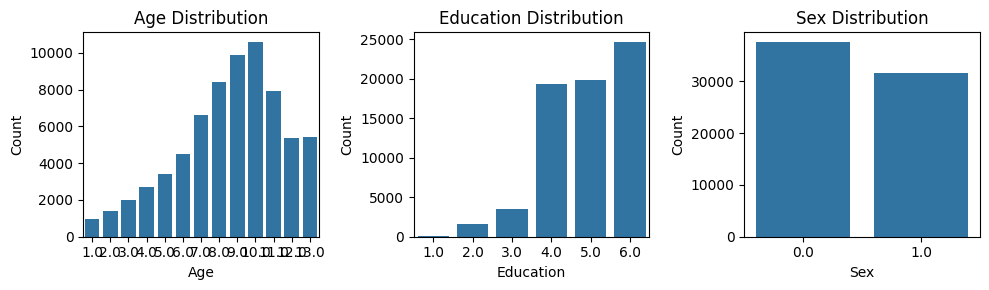

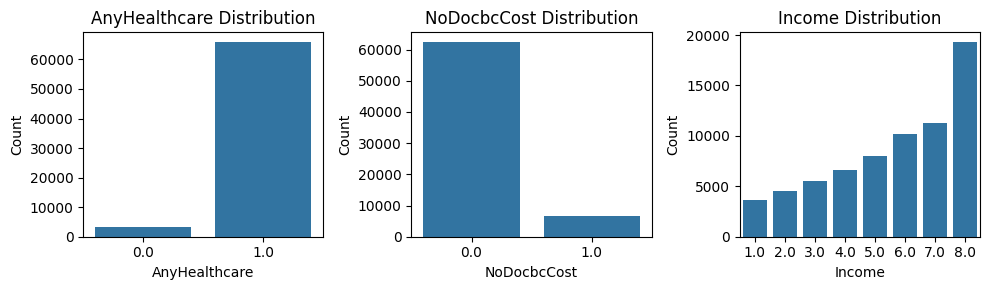

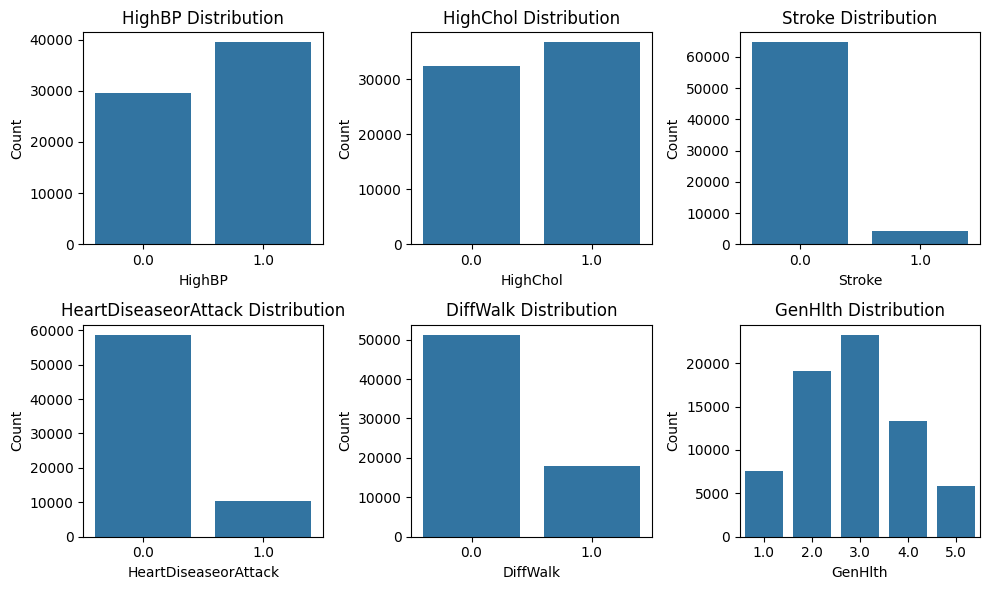

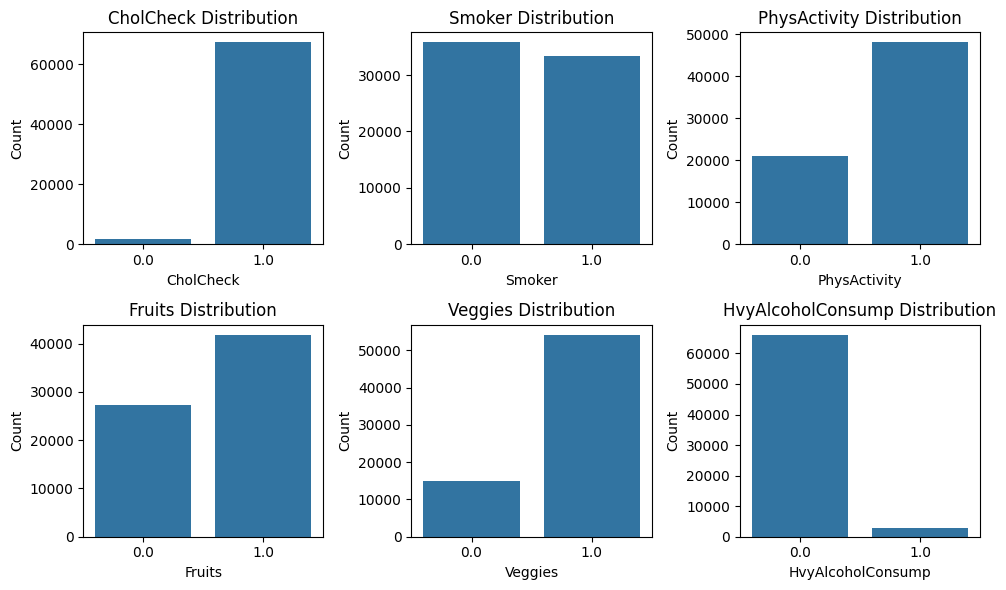

In [31]:
#visualizing categorical variables
categorical_colsD = ['Age', 'Education', 'Sex']
categorical_colsM = ['HighBP', 'HighChol', 'Stroke', 'HeartDiseaseorAttack', 'DiffWalk', 'GenHlth']
categorical_colsB = ['CholCheck', 'Smoker', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump']
categorical_colsS = ['AnyHealthcare', 'NoDocbcCost', 'Income']

fig, axes = plt.subplots(1, 3, figsize=(10, 3))  
axes = axes.flatten()  
for i, col in enumerate(categorical_colsD):
    sns.countplot(data=data, x=col, ax=axes[i])
    axes[i].set_title(f'{col} Distribution')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')
plt.tight_layout()
plt.show()

fig, axes = plt.subplots(1, 3, figsize=(10, 3))  
axes = axes.flatten()
for i, col in enumerate(categorical_colsS):
    sns.countplot(data=data, x=col, ax=axes[i])
    axes[i].set_title(f'{col} Distribution')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')
plt.tight_layout()
plt.show()

fig, axes = plt.subplots(2, 3, figsize=(10, 6))  
axes = axes.flatten() 
for i, col in enumerate(categorical_colsM):
    sns.countplot(data=data, x=col, ax=axes[i])
    axes[i].set_title(f'{col} Distribution')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')
plt.tight_layout()
plt.show()

fig, axes = plt.subplots(2, 3, figsize=(10, 6))  
axes = axes.flatten() 
for i, col in enumerate(categorical_colsB):
    sns.countplot(data=data, x=col, ax=axes[i])
    axes[i].set_title(f'{col} Distribution')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')
plt.tight_layout()
plt.show()

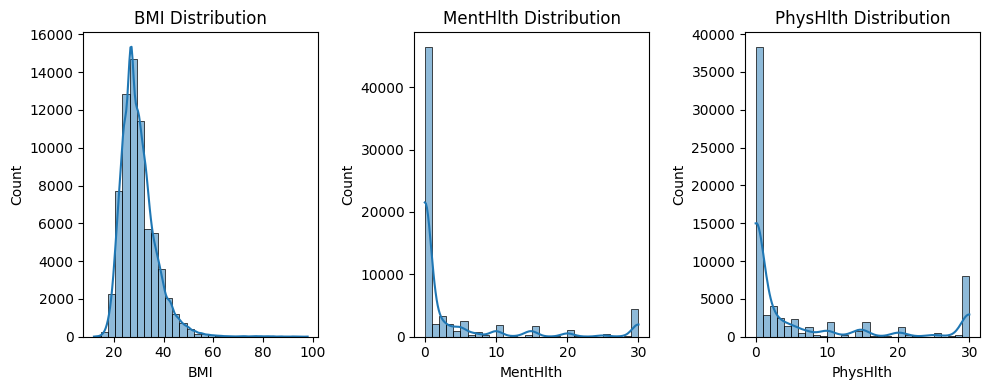

In [32]:
#visualizing numerical/continuous variables
numerical_cols = ['BMI', 'MentHlth', 'PhysHlth']

fig, axes = plt.subplots(1, 3, figsize=(10, 4))

for i, col in enumerate(numerical_cols):
    sns.histplot(data[col], kde=True, ax=axes[i], bins=30)
    axes[i].set_title(f'{col} Distribution')
    axes[i].set_xlabel(col)

plt.tight_layout()
plt.show()

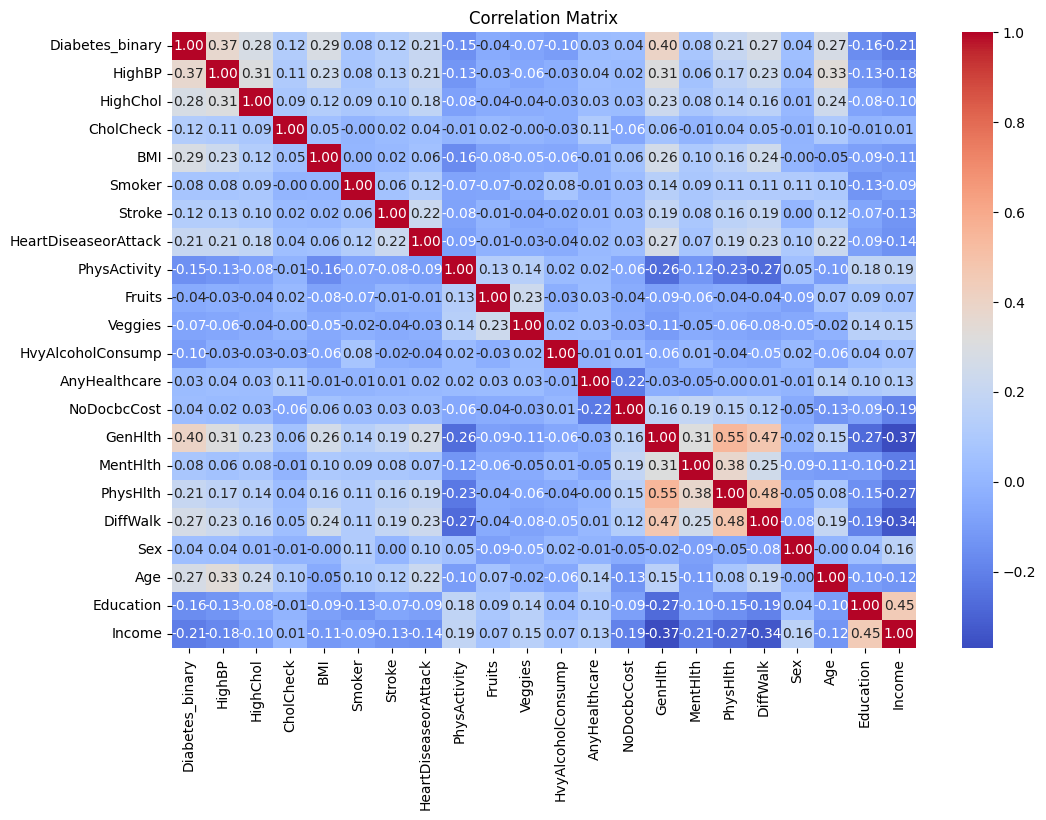

In [33]:
plt.figure(figsize=(12, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

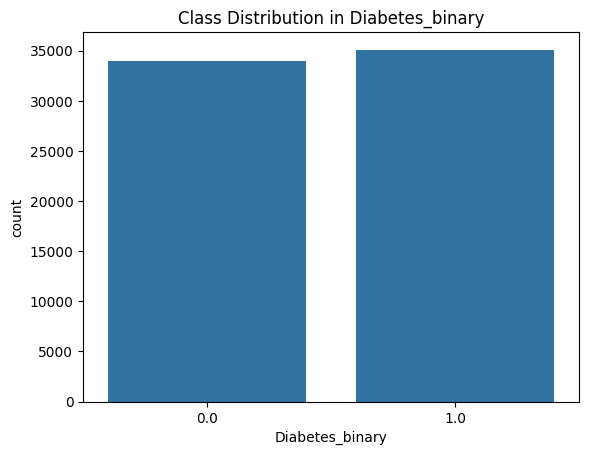

In [34]:
#checking for class imbalance in target variable
sns.countplot(data=data, x='Diabetes_binary')
plt.title('Class Distribution in Diabetes_binary')
plt.show()

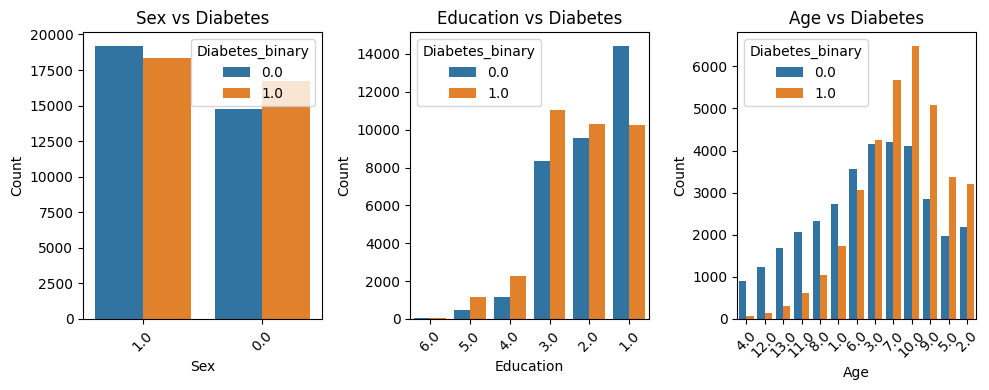

In [35]:
#relationship between demographic variables (age , sex, education) and diabetes
demographic_cols = ['Sex', 'Education', 'Age']
target = 'Diabetes_binary'

fig, axes = plt.subplots(1, 3, figsize=(10, 4))
axes = axes.flatten()

for i, col in enumerate (demographic_cols):
    sns.countplot(data=data, x=col, hue=target, ax = axes[i])
    axes[i].set_title(f'{col} vs Diabetes')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')
    axes[i].set_xticks(range(len(data[col].unique())))
    axes[i].set_xticklabels(data[col].unique(), rotation=45)
plt.tight_layout()
plt.show()

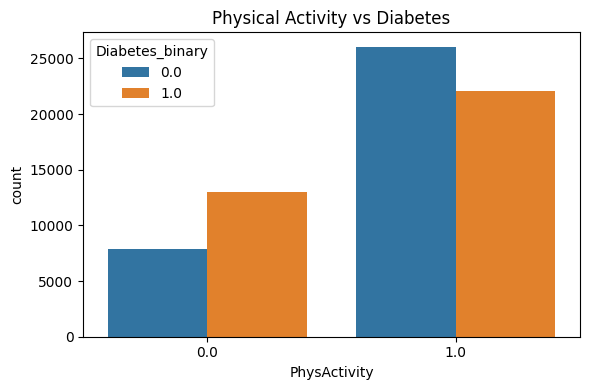

In [36]:
#relationship between physical activity and diabetes
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='PhysActivity', hue=target)
plt.title('Physical Activity vs Diabetes')
plt.tight_layout()
plt.show()

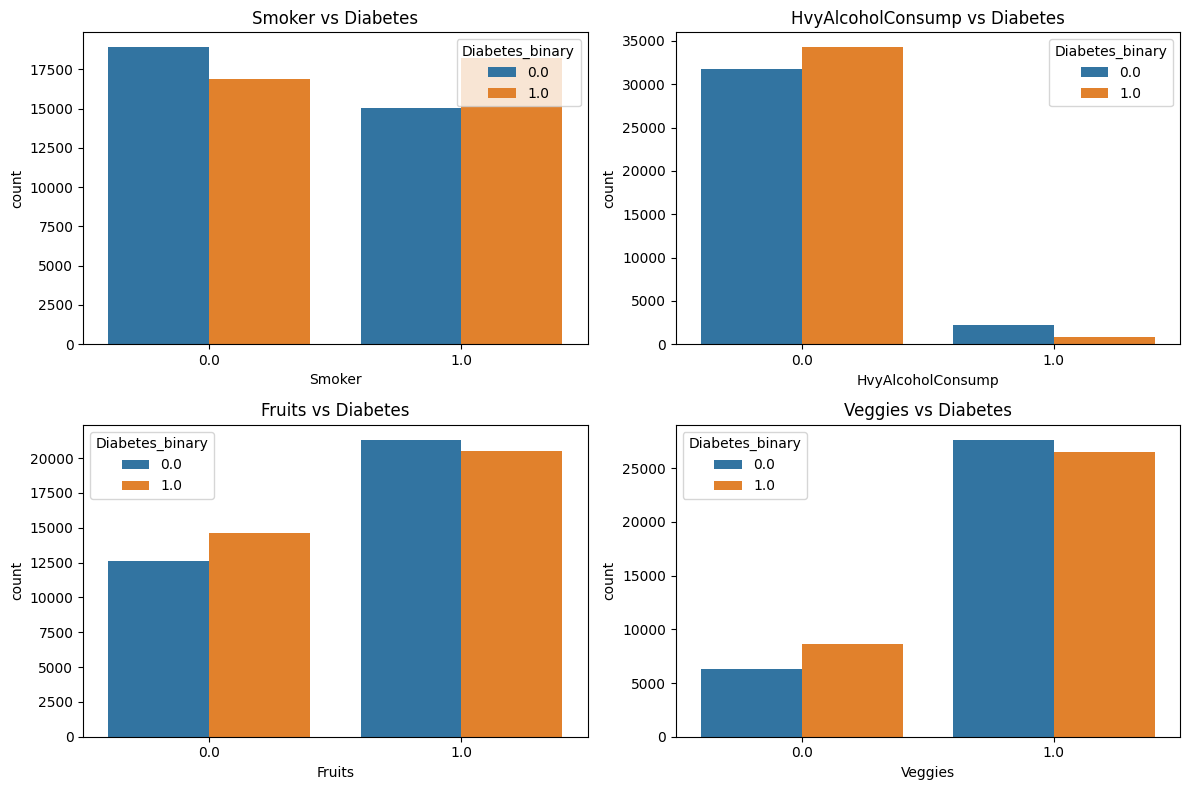

In [37]:
#relationship between lifestyle factors (smoking, alcohol consumption) and diabetes
lifestyle_cols = ['Smoker', 'HvyAlcoholConsump', 'Fruits', 'Veggies']

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

for i, col in enumerate(lifestyle_cols):
    sns.countplot(data=data, x=col, hue=target, ax=axes[i])
    axes[i].set_title(f'{col} vs Diabetes')
    axes[i].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

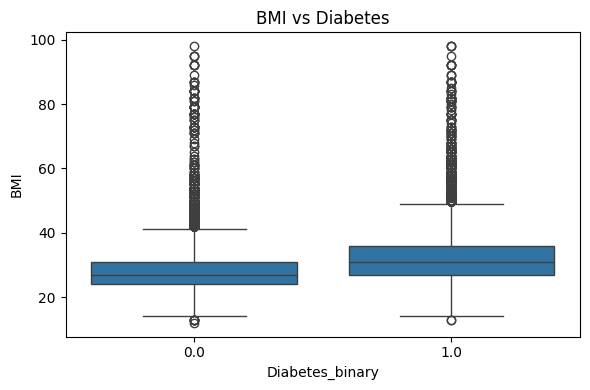

In [38]:
#relationship between BMI and diabetes
plt.figure(figsize=(6, 4))
sns.boxplot(data=data, x=target, y='BMI')
plt.title('BMI vs Diabetes')
plt.tight_layout()
plt.show()

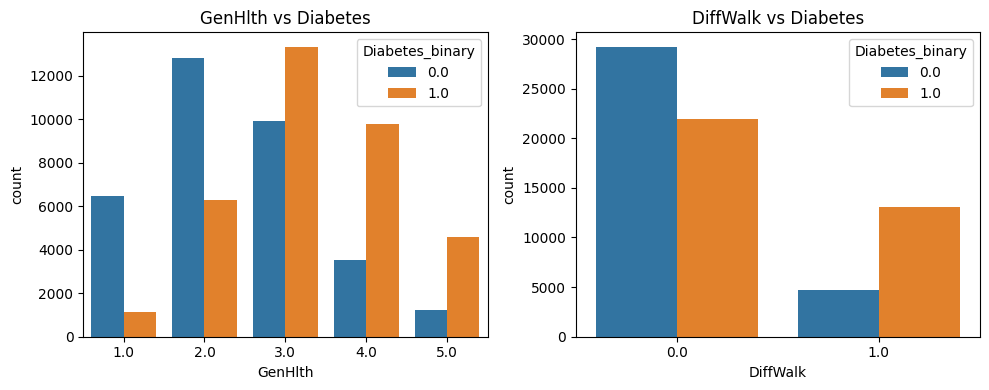

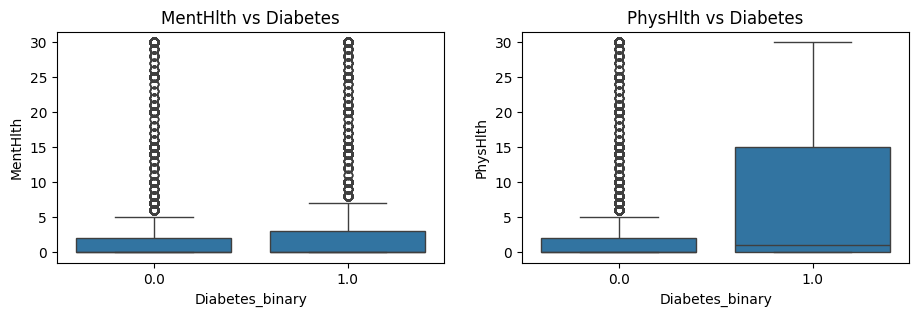

In [39]:
#relationship between health indicators (GenHlth, DiffWalk) and diabetes
health_cols1 = ['GenHlth','DiffWalk']

fig, axes = plt.subplots(1, 2, figsize=(10, 4))
axes = axes.flatten()

for i, col in enumerate(health_cols1):
    sns.countplot(data=data, x=col, hue=target, ax=axes[i])
    axes[i].set_title(f'{col} vs Diabetes')
    axes[i].tick_params(axis='x', rotation=0)
plt.tight_layout()
plt.show()

#relationship between health indicators (MentHlth, PhysHlth) and diabetes
health_cols2 = ['MentHlth', 'PhysHlth',]

fig, axes = plt.subplots(1, 2, figsize=(11, 3))
axes = axes.flatten()
for i, col in enumerate(health_cols2):
    sns.boxplot(data=data, x=target, y=col, ax=axes[i])
    axes[i].set_title(f'{col} vs Diabetes')
    axes[i].tick_params(axis='x', rotation=0)


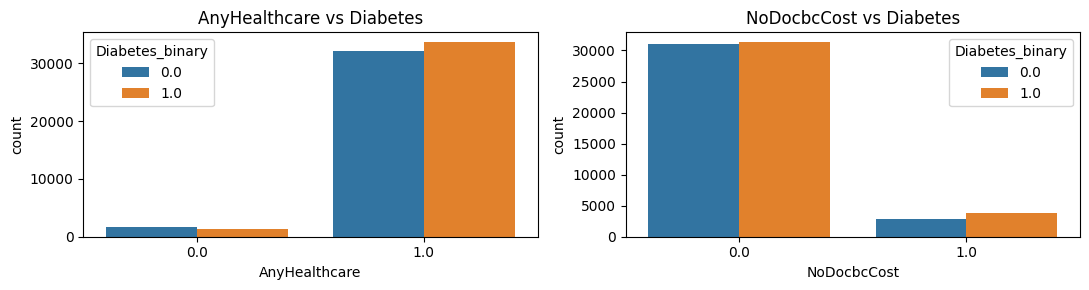

In [40]:
#relationship between health care access (AnyHlthCare, NoDocbcCost) and diabetes
health_access_cols = ['AnyHealthcare', 'NoDocbcCost']

fig, axes= plt.subplots(1, 2, figsize=(11, 3))
for i, col in enumerate(health_access_cols):
    sns.countplot(data=data, x=col, hue=target, ax=axes[i])
    axes[i].set_title(f'{col} vs Diabetes')
plt.tight_layout()
plt.show()

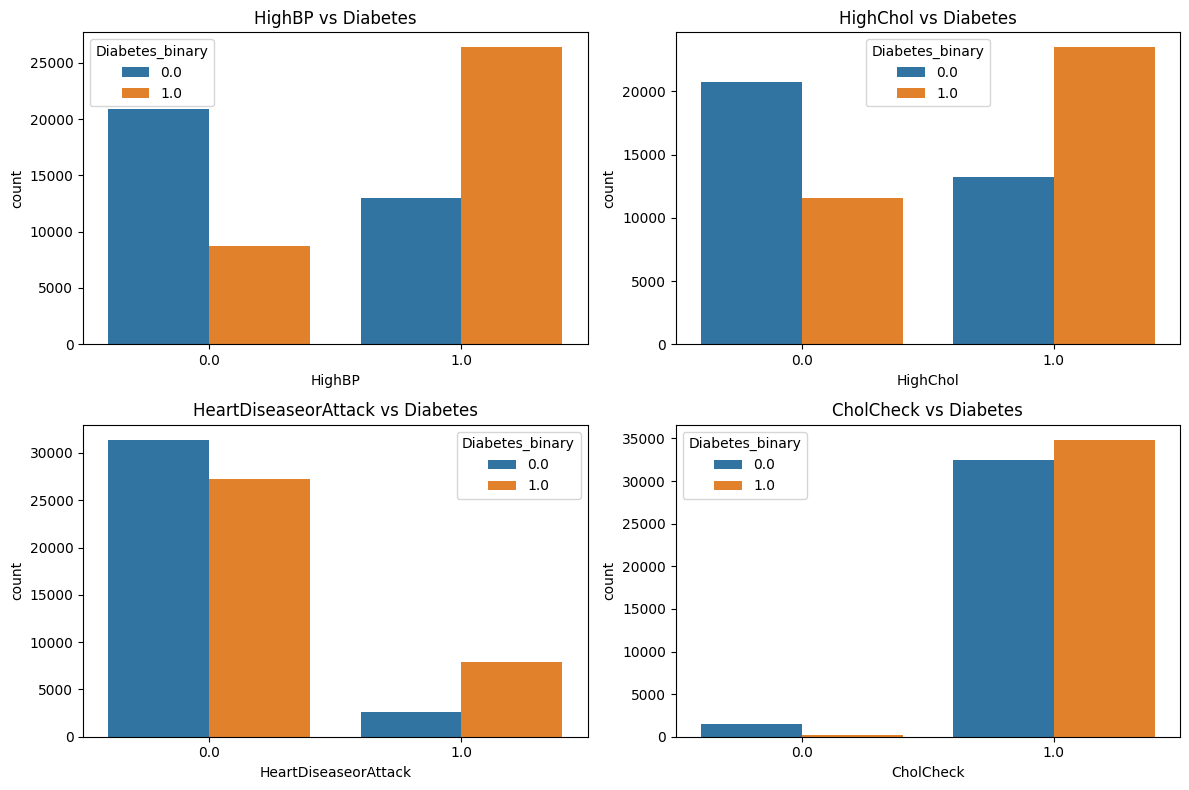

In [41]:
#relationship between cardiovascular conditions and diabetes

cvd_cols = ['HighBP', 'HighChol', 'HeartDiseaseorAttack', 'CholCheck']

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

for i, col in enumerate(cvd_cols):
    sns.countplot(data=data, x=col, hue=target, ax=axes[i])
    axes[i].set_title(f'{col} vs Diabetes')
    axes[i].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

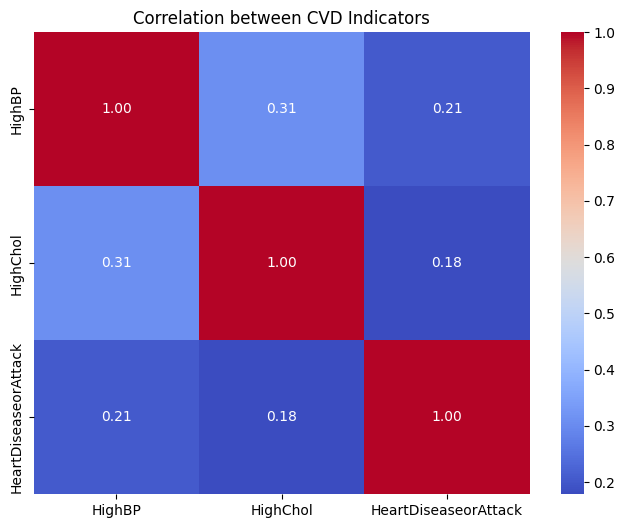

In [42]:
#heatmap correlation between highbp, highchol, heart disease
cvd_cols2 = ['HighBP', 'HighChol', 'HeartDiseaseorAttack']
plt.figure(figsize=(8, 6))
sns.heatmap(data[cvd_cols2].corr(), annot=True, cmap='coolwarm', fmt=".2f") 
plt.title('Correlation between CVD Indicators')
plt.show()

MACHINE LEARNING

In [43]:
data[['PhysHlth', 'MentHlth', 'BMI']].describe()

,PhysHlth,MentHlth,BMI
count,69057.000000,69057.000000,69057.000000
mean,5.945306,3.840103,29.955834
std,10.139113,8.231164,7.147972
min,0.000000,0.000000,12.000000
25%,0.000000,0.000000,25.000000
50%,0.000000,0.000000,29.000000
75%,6.000000,3.000000,33.000000
max,30.000000,30.000000,98.000000


In [44]:
#To deal with outliers.
scaler = RobustScaler()
data[['BMI', 'MentHlth', 'PhysHlth']] = scaler.fit_transform(data[['BMI', 'MentHlth', 'PhysHlth']])
   

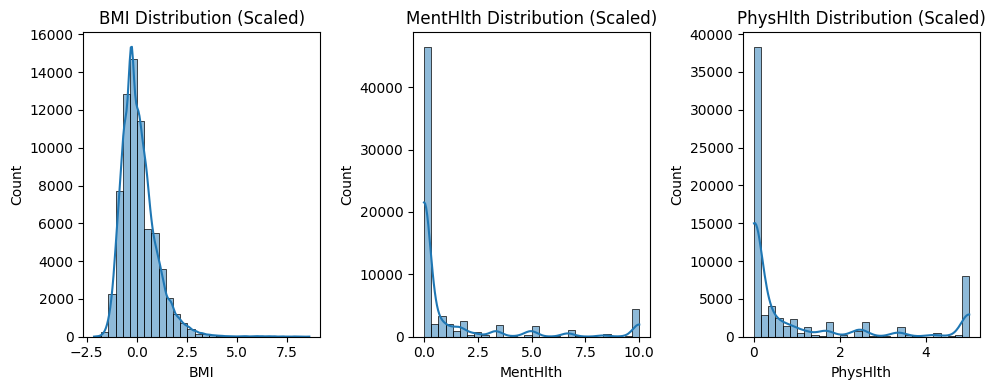

In [45]:
#visuaulizing the distribution of the scaled variables
fig, axes = plt.subplots(1, 3, figsize=(10, 4))
axes = axes.flatten()

for i, col in enumerate(['BMI', 'MentHlth', 'PhysHlth']):
    sns.histplot(data[col], kde=True, ax=axes[i], bins=30)
    axes[i].set_title(f'{col} Distribution (Scaled)')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')
plt.tight_layout()
plt.show()

In [46]:
# Drop or encode categorical variables appropriately
X = data.drop('Diabetes_binary', axis=1)
y = data['Diabetes_binary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "MLP": MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42),
    "SVM": SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    results[name] = acc

    print(f"\n {name} Results:")
    print("Accuracy:", round(acc, 4))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))


 Logistic Regression Results:
Accuracy: 0.7512
Confusion Matrix:
 [[4891 1832]
 [1604 5485]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.75      0.73      0.74      6723
         1.0       0.75      0.77      0.76      7089

    accuracy                           0.75     13812
   macro avg       0.75      0.75      0.75     13812
weighted avg       0.75      0.75      0.75     13812



c:\Users\user\Documents\Salau's Team Data Science project\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:27:59] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



 XGBoost Results:
Accuracy: 0.7525
Confusion Matrix:
 [[4788 1935]
 [1483 5606]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.76      0.71      0.74      6723
         1.0       0.74      0.79      0.77      7089

    accuracy                           0.75     13812
   macro avg       0.75      0.75      0.75     13812
weighted avg       0.75      0.75      0.75     13812


 MLP Results:
Accuracy: 0.751
Confusion Matrix:
 [[4957 1766]
 [1673 5416]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.75      0.74      0.74      6723
         1.0       0.75      0.76      0.76      7089

    accuracy                           0.75     13812
   macro avg       0.75      0.75      0.75     13812
weighted avg       0.75      0.75      0.75     13812


 SVM Results:
Accuracy: 0.7571
Confusion Matrix:
 [[4607 2116]
 [1239 5850]]
Classification Report:
               precision    recall  f1

C:\Users\user\AppData\Local\Temp\ipykernel_17004\237247478.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(results.keys()), y=list(results.values()), palette='viridis')


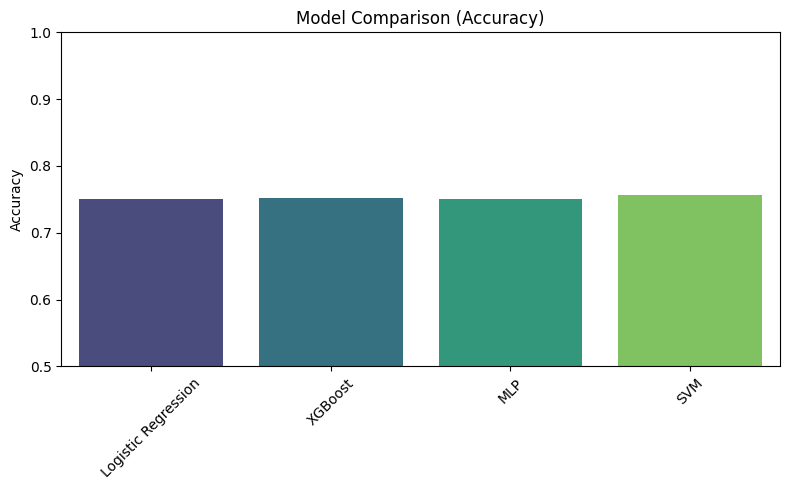

In [49]:
#Visualize comparison
plt.figure(figsize=(8, 5))
sns.barplot(x=list(results.keys()), y=list(results.values()), palette='viridis')
plt.ylabel("Accuracy")
plt.title("Model Comparison (Accuracy)")
plt.ylim(0.5, 1.0)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_17004\405860379.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=coef_df, palette='coolwarm')


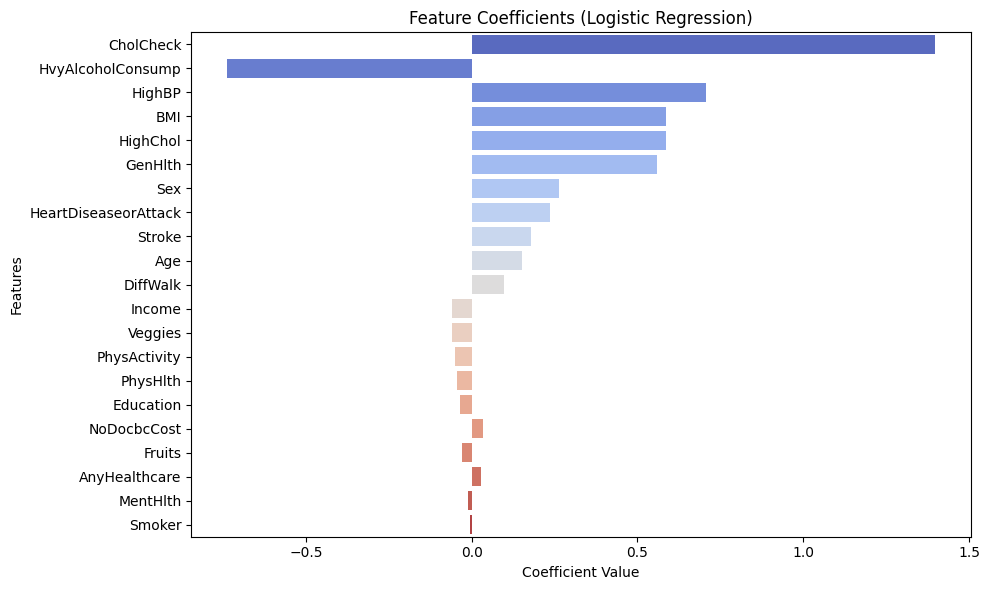

In [50]:
# Get coefficients using Logistic Regression
coefficients = models["Logistic Regression"].coef_[0]
feature_names = X_train.columns

coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
coef_df['Abs_Coefficient'] = coef_df['Coefficient'].abs()
coef_df = coef_df.sort_values(by='Abs_Coefficient', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coef_df, palette='coolwarm')
plt.title("Feature Coefficients (Logistic Regression)")
plt.xlabel("Coefficient Value")
plt.ylabel("Features")
plt.tight_layout()
plt.show()



In [51]:
# Get feature importances (using Random Forest)
importances = models['Random Forest'].feature_importances_
features = X_train.columns
feat_imp_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df, palette='mako')
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()


KeyError: 'Random Forest'

<Figure size 1000x600 with 0 Axes>

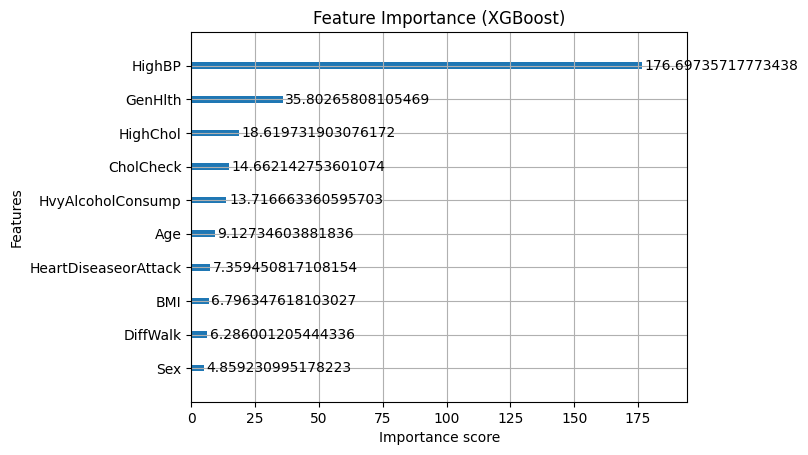

In [ ]:
# Plot built-in importance
from xgboost import plot_importance

plt.figure(figsize=(10, 6))
plot_importance(models['XGBoost'], max_num_features=10, importance_type='gain')
plt.title("Feature Importance (XGBoost)")
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_12204\1257893858.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=perm_df, palette='viridis')


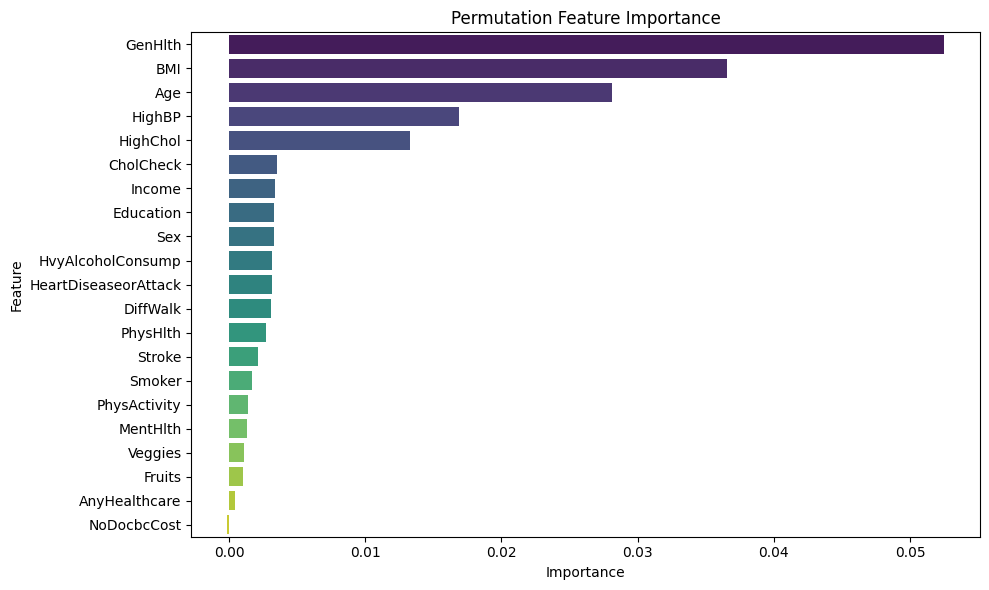

In [ ]:
from sklearn.inspection import permutation_importance

result = permutation_importance(modelM, X_test, y_test, n_repeats=10, random_state=42)
perm_df = pd.DataFrame({'Feature': X_test.columns, 'Importance': result.importances_mean})
perm_df = perm_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=perm_df, palette='viridis')
plt.title("Permutation Feature Importance")
plt.tight_layout()
plt.show()
